# Pip Install Keras-Tuner (if necessary)

In [1]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 13.8 MB/s 


# Import Required Packages

In [2]:
from data_creation import DataSelection
from prediction_LSTM import SolarLSTM
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Base Model with All Parameters

In [2]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

DataSelection(data, 2014, "./", 38)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.00268399715423584
Num GB used in data array: 0.006217360496520996
Num GB used in data array: 0.011721253395080566
Num GB used in data array: 0.013895630836486816
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.016783475875854492
Num GB used in data array: 0.02300083637237549
Num GB used in data array: 0.023374557495117188
Num GB used in data array: 0.026805996894836426
Num GB used in data array: 0.028708577156066895
Num GB used in data array: 0.040463805198669434
Num GB used in data array: 0.0423663854598999
Num GB used in data array: 0.0478363037109375
Num GB used in data array: 0.056092143058776855
Num GB used in data array: 0.05714535713195801
Num GB used in data array: 0.10426819324493408
Num GB used in data array: 0.10912656784057617
Num GB used in data array: 0.10950028896331787
Num GB used in data array: 0.10970413684844971
Num GB used in data array: 0.11109709739685059
Num

In [3]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", 38, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0031256675720214844
Num GB used in data array: 0.010973811149597168
Num GB used in data array: 0.017496943473815918
Num GB used in data array: 0.02415597438812256
Num GB used in data array: 0.03142654895782471
Num GB used in data array: 0.033329129219055176
Num GB used in data array: 0.035231709480285645
Num GB used in data array: 0.04630744457244873
Num GB used in data array: 0.04668116569519043
Num GB used in data array: 0.04759848117828369
Num GB used in data array: 0.05874216556549072
Num GB used in data array: 0.06064474582672119
Num GB used in data array: 0.06152808666229248
Num GB used in data array: 0.07073521614074707
Num GB used in data array: 0.07178843021392822
Num GB used in data array: 0.11503815650939941
Num GB used in data array: 0.12271642684936523
Num GB used in data array: 0.12614786624908447
Num GB used in data array: 0.1263517141342163
Num GB used in data array: 0.12726902961730957
Num GB

In [4]:
data2014 = np.load("data_2014.npy")
labels2014 = np.load("labels_2014.npy")

In [5]:
data2014.shape

(25649, 120, 38)

In [6]:
base_model = SolarLSTM(data2014, labels2014, save_path="./")

In [7]:
base_model.build_model()

In [8]:
base_model.model.summary()

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.4057 - accuracy: 0.8528 - mse: 0.1213 - mae: 0.2484

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 35s 97ms/step - loss: 0.4057 - accuracy: 0.8528 - mse: 0.1213 - mae: 0.2484 - val_loss: 0.4691 - val_accuracy: 0.8086 - val_mse: 0.1478 - val_mae: 0.2661
Epoch 2/50
320/320 [==============================] - 21s 65ms/step - loss: 0.2878 - accuracy: 0.8942 - mse: 0.0814 - mae: 0.1693 - val_loss: 0.6135 - val_accuracy: 0.8093 - val_mse: 0.1728 - val_mae: 0.2174
Epoch 3/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2504 - accuracy: 0.9223 - mse: 0.0676 - mae: 0.1374 - val_loss: 0.5824 - val_accuracy: 0.8039 - val_mse: 0.1678 - val_mae: 0.2211
Epoch 4/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2279 - accuracy: 0.9191 - mse: 0.0625 - mae: 0.1257 - val_loss: 0.5721 - val_accuracy: 0.8038 - val_mse: 0.1620 - val_mae: 0.2112
Epoch 5/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2012 - accuracy: 0.9320 - mse: 0.0540 - mae: 0.1122 - val_loss: 0.6783 - val_accuracy: 0.8073 - val_m

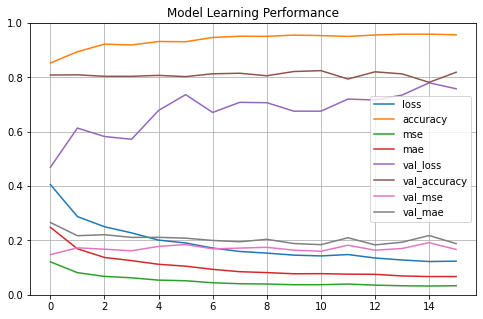

In [9]:
history=base_model.fit()

In [10]:
data2015 = np.load("data_2015.npy")
labels2015 = np.load("labels_2015.npy")

In [11]:
data2015.shape

(28486, 120, 38)

In [12]:
data_new = base_model.batch_prefetch_data(data2015,labels2015,split_data=False)
base_model.evaluate(data_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 11s 21ms/step - loss: 0.8055 - accuracy: 0.8060 - mse: 0.1720 - mae: 0.2027


[0.8054584860801697,
 0.8060483932495117,
 0.17199039459228516,
 0.2027323991060257]

In [13]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = base_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%base_model.batch_size)]

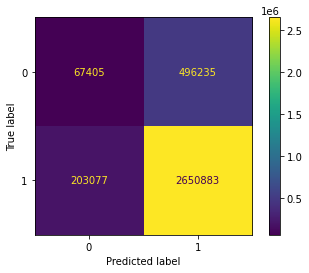

In [14]:
#Do predictions and get confusion matrix
conf_matrix = base_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [ ]:
#If you want to customize the confusion matrix plot, can uncomment below and use the plot handle below
#conf_plt_handle=base_model.plot_confusion_matrix(conf_matrix)

In [15]:
conf_matrix

array([[  67405,  496235],
       [ 203077, 2650883]])

In [16]:
#Example of using the __call__ dunder method to pass data
call_preds=base_model(batched_2015)

In [17]:
import pandas as pd

def calculate_statistics(conf_matrix):
  tp = conf_matrix[1][1]
  fp = conf_matrix[1][0]
  tn = conf_matrix[0][0]
  fn = conf_matrix[0][1]

  # Precision - TP/(TP+FP)
  precision = tp / np.sum([tp, fp])

  # Recall - TP/(TP+FN)
  recall = tp / np.sum([tp, fn])

  # False Alarm Rate/Probability of False Alarm - FP/(FP+TN)
  far = fp / np.sum([fp, tn])

  # Heidke Skill Score (HSS) - 2*(TP * TN - FP * FN) / (TP+FN)*(FN+TN)+(TP+FP)*(FP+TN)
  hss = (2 * ((tp*tn) - (fp*fn))) / (((tp+fn)*(fn+tn)) + ((tp+tn)*(fp+tn)))

  return pd.DataFrame({"precision": precision, "recall": recall, "far": far, "hss": hss}, index=[0])

In [18]:
calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.928844,0.842321,0.750797,0.062101


In [19]:
keras.backend.clear_session()

In [20]:
tuned_model = SolarLSTM(data2014, labels2014, "./", tune=True)

Trial 10 Complete [00h 08m 16s]
val_accuracy: 0.8479964137077332

Best val_accuracy So Far: 0.8479964137077332
Total elapsed time: 01h 55m 24s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3774 - accuracy: 0.8843 - mse: 0.1085 - mae: 0.2130

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 38s 110ms/step - loss: 0.3774 - accuracy: 0.8843 - mse: 0.1085 - mae: 0.2130 - val_loss: 0.5081 - val_accuracy: 0.8094 - val_mse: 0.1516 - val_mae: 0.2335
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.3067 - accuracy: 0.8977 - mse: 0.0884 - mae: 0.1721

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 35s 109ms/step - loss: 0.3067 - accuracy: 0.8977 - mse: 0.0884 - mae: 0.1721 - val_loss: 0.5074 - val_accuracy: 0.8094 - val_mse: 0.1471 - val_mae: 0.2201
Epoch 3/50
320/320 [==============================] - 26s 83ms/step - loss: 0.2652 - accuracy: 0.8884 - mse: 0.0776 - mae: 0.1517 - val_loss: 0.5452 - val_accuracy: 0.8094 - val_mse: 0.1501 - val_mae: 0.2159
Epoch 4/50
320/320 [==============================] - 26s 82ms/step - loss: 0.2240 - accuracy: 0.8922 - mse: 0.0643 - mae: 0.1283 - val_loss: 0.6848 - val_accuracy: 0.8131 - val_mse: 0.1711 - val_mae: 0.2074
Epoch 5/50
320/320 [==============================] - 27s 83ms/step - loss: 0.2018 - accuracy: 0.9235 - mse: 0.0566 - mae: 0.1134 - val_loss: 0.6796 - val_accuracy: 0.8015 - val_mse: 0.1711 - val_mae: 0.2089
Epoch 6/50
320/320 [==============================] - 26s 82ms/step - loss: 0.1747 - accuracy: 0.9384 - mse: 0.0480 - mae: 0.0985 - val_loss: 0.6672 - val_accuracy: 0.8115 - val_

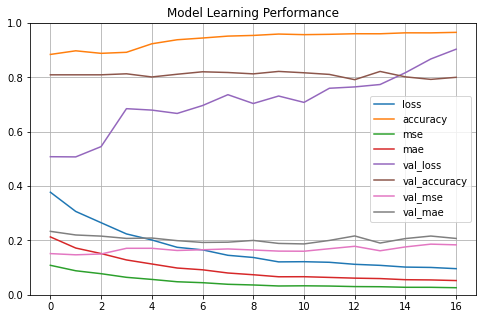

In [21]:
tuned_model.fit()

In [22]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = tuned_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%tuned_model.batch_size)]

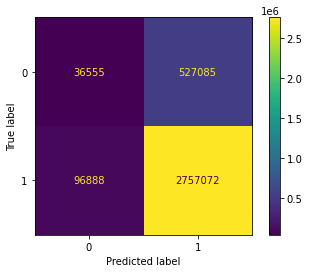

In [23]:
conf_matrix = tuned_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [24]:
calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.966051,0.839507,0.726063,0.044712


In [25]:
tuned_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 32)             9088      
                                                                 
 lstm_3 (LSTM)               (64, 120, 32)             8320      
                                                                 
 dropout_1 (Dropout)         (64, 120, 32)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              33        
                                                                 
Total params: 17,441
Trainable params: 17,441
Non-trainable params: 0
_________________________________________________________________


# Models for ONLY Magnetic Field Parameters

In DataSelection() set the following arguments:

* use_all=False
* select_columns=[magnetic field parameters]

In [3]:
mf_parameters = ["TOTUSJH", "TOTBSQ", "TOTPOT", "TOTUSJZ", "ABSNJZH", "SAVNCPP",
                 "USFLUX", "TOTFZ", "MEANPOT", "EPSZ", "MEANSHR", "SHRGT45", 
                 "MEANGAM", "MEANGBT", "MEANGBZ", "MEANGBH", "MEANJZH", "TOTFY",
                 "MEANJZD", "MEANALP", "TOTFX", "EPSY", "EPSX", "R_VALUE"]

## Creating Data

In [4]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

DataSelection(data, 2014, "./", 24, use_all=False, select_columns=mf_parameters)

Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.0016951560974121094
Num GB used in data array: 0.003926753997802734
Num GB used in data array: 0.007402896881103516
Num GB used in data array: 0.008776187896728516
Num GB used in data array: 0.009806156158447266
Num GB used in data array: 0.010600090026855469
Num GB used in data array: 0.014526844024658203
Num GB used in data array: 0.01476287841796875
Num GB used in data array: 0.016930103302001953
Num GB used in data array: 0.018131732940673828
Num GB used in data array: 0.025556087493896484
Num GB used in data array: 0.02675771713256836
Num GB used in data array: 0.03021240234375
Num GB used in data array: 0.03542661666870117
Num GB used in data array: 0.03609180450439453
Num GB used in data array: 0.06585359573364258
Num GB used in data array: 0.06892204284667969
Num GB used in data array: 0.06915807723999023
Num GB used in data array: 0.06928682327270508
Num GB used in data array: 0.07016658782958984
Num 

In [5]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", 24, use_all=False, select_columns=mf_parameters,
              norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.0019741058349609375
Num GB used in data array: 0.006930828094482422
Num GB used in data array: 0.011050701141357422
Num GB used in data array: 0.015256404876708984
Num GB used in data array: 0.019848346710205078
Num GB used in data array: 0.021049976348876953
Num GB used in data array: 0.022251605987548828
Num GB used in data array: 0.029246807098388672
Num GB used in data array: 0.02948284149169922
Num GB used in data array: 0.030062198638916016
Num GB used in data array: 0.03710031509399414
Num GB used in data array: 0.038301944732666016
Num GB used in data array: 0.03885984420776367
Num GB used in data array: 0.04467487335205078
Num GB used in data array: 0.04534006118774414
Num GB used in data array: 0.07265567779541016
Num GB used in data array: 0.07750511169433594
Num GB used in data array: 0.07967233657836914
Num GB used in data array: 0.07980108261108398
Num GB used in data array: 0.08038043975830078
N

## Load Data and Run Models

In [6]:
data2014_mf = np.load("data_2014.npy")
labels2014_mf = np.load("labels_2014.npy")

In [7]:
mf_model = SolarLSTM(data2014_mf, labels2014_mf, "./")

In [8]:
mf_model.build_model()

In [9]:
mf_model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (64, 120, 16)             2624      
                                                                 
 lstm_1 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout (Dropout)           (64, 120, 16)             0         
                                                                 
 dense (Dense)               (64, 120, 1)              17        
                                                                 
Total params: 4,753
Trainable params: 4,753
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8803 - mse: 0.1130 - mae: 0.2293

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 35s 99ms/step - loss: 0.3924 - accuracy: 0.8803 - mse: 0.1130 - mae: 0.2293 - val_loss: 0.5093 - val_accuracy: 0.8094 - val_mse: 0.1585 - val_mae: 0.2503
Epoch 2/50
320/320 [==============================] - 22s 68ms/step - loss: 0.3198 - accuracy: 0.8957 - mse: 0.0909 - mae: 0.1783 - val_loss: 0.5221 - val_accuracy: 0.8086 - val_mse: 0.1581 - val_mae: 0.2374
Epoch 3/50
320/320 [==============================] - ETA: 0s - loss: 0.3057 - accuracy: 0.8961 - mse: 0.0864 - mae: 0.1683

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 30s 94ms/step - loss: 0.3057 - accuracy: 0.8961 - mse: 0.0864 - mae: 0.1683 - val_loss: 0.5050 - val_accuracy: 0.8130 - val_mse: 0.1503 - val_mae: 0.2334
Epoch 4/50
320/320 [==============================] - 22s 68ms/step - loss: 0.2878 - accuracy: 0.9003 - mse: 0.0808 - mae: 0.1599 - val_loss: 0.5473 - val_accuracy: 0.8063 - val_mse: 0.1623 - val_mae: 0.2250
Epoch 5/50
320/320 [==============================] - 22s 67ms/step - loss: 0.2666 - accuracy: 0.9022 - mse: 0.0738 - mae: 0.1484 - val_loss: 0.5698 - val_accuracy: 0.7873 - val_mse: 0.1682 - val_mae: 0.2396
Epoch 6/50
320/320 [==============================] - 22s 69ms/step - loss: 0.2459 - accuracy: 0.9174 - mse: 0.0667 - mae: 0.1354 - val_loss: 0.6448 - val_accuracy: 0.7984 - val_mse: 0.1760 - val_mae: 0.2236
Epoch 7/50
320/320 [==============================] - 22s 69ms/step - loss: 0.2306 - accuracy: 0.9219 - mse: 0.0617 - mae: 0.1267 - val_loss: 0.6161 - val_accuracy: 0.7771 - val_m

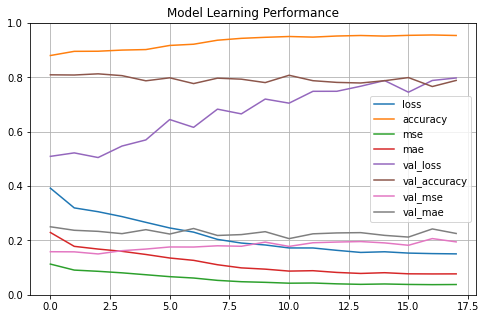

In [10]:
history=mf_model.fit()

In [11]:
data2015_mf = np.load("data_2015.npy")
labels2015_mf = np.load("labels_2015.npy")

In [12]:
data2015_mf.shape

(28486, 120, 24)

In [13]:
mf_new = mf_model.batch_prefetch_data(data2015_mf,labels2015_mf,split_data=False)
mf_model.evaluate(mf_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 10s 21ms/step - loss: 0.6861 - accuracy: 0.8113 - mse: 0.1698 - mae: 0.2024


[0.6860914826393127,
 0.8113354444503784,
 0.16979898512363434,
 0.20242321491241455]

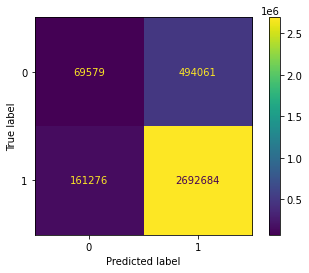

In [14]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_mf = mf_model.batch_prefetch_data(data2015_mf,split_data=False)
#Cutoff matching remainder from labels
true_labels_mf = labels2015_mf[:-(labels2015_mf.shape[0] % mf_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_mf = mf_model.predict_conf_matrix(batched_2015_mf,true_labels_mf,make_plots=True)

In [15]:
conf_matrix_mf

array([[  69579,  494061],
       [ 161276, 2692684]])

In [16]:
mf_model.calculate_statistics(conf_matrix_mf)

,precision,recall,far,hss
0,0.94349,0.844964,0.698603,0.08848


In [20]:
keras.backend.clear_session()

In [21]:
tuned_model_mf = SolarLSTM(data2014_mf, labels2014_mf, "./", tune=True)

Trial 10 Complete [00h 24m 05s]
val_accuracy: 0.8095003366470337

Best val_accuracy So Far: 0.8247346878051758
Total elapsed time: 03h 14m 13s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.4009 - accuracy: 0.8649 - mse: 0.1189 - mae: 0.2443

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 35s 97ms/step - loss: 0.4009 - accuracy: 0.8649 - mse: 0.1189 - mae: 0.2443 - val_loss: 0.4729 - val_accuracy: 0.8094 - val_mse: 0.1482 - val_mae: 0.2566
Epoch 2/50
320/320 [==============================] - 22s 68ms/step - loss: 0.3151 - accuracy: 0.8973 - mse: 0.0899 - mae: 0.1793 - val_loss: 0.4919 - val_accuracy: 0.8094 - val_mse: 0.1492 - val_mae: 0.2361
Epoch 3/50
320/320 [==============================] - ETA: 0s - loss: 0.3021 - accuracy: 0.8938 - mse: 0.0848 - mae: 0.1654

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 30s 94ms/step - loss: 0.3021 - accuracy: 0.8938 - mse: 0.0848 - mae: 0.1654 - val_loss: 0.4719 - val_accuracy: 0.8103 - val_mse: 0.1420 - val_mae: 0.2345
Epoch 4/50
320/320 [==============================] - 21s 67ms/step - loss: 0.2792 - accuracy: 0.8972 - mse: 0.0777 - mae: 0.1554 - val_loss: 0.5318 - val_accuracy: 0.8091 - val_mse: 0.1606 - val_mae: 0.2360
Epoch 5/50
320/320 [==============================] - 21s 66ms/step - loss: 0.2560 - accuracy: 0.9089 - mse: 0.0704 - mae: 0.1455 - val_loss: 0.5356 - val_accuracy: 0.8070 - val_mse: 0.1586 - val_mae: 0.2387
Epoch 6/50
320/320 [==============================] - 22s 67ms/step - loss: 0.2329 - accuracy: 0.9248 - mse: 0.0622 - mae: 0.1280 - val_loss: 0.5839 - val_accuracy: 0.7955 - val_mse: 0.1696 - val_mae: 0.2328
Epoch 7/50
320/320 [==============================] - 21s 67ms/step - loss: 0.2170 - accuracy: 0.9316 - mse: 0.0578 - mae: 0.1197 - val_loss: 0.6046 - val_accuracy: 0.7705 - val_m

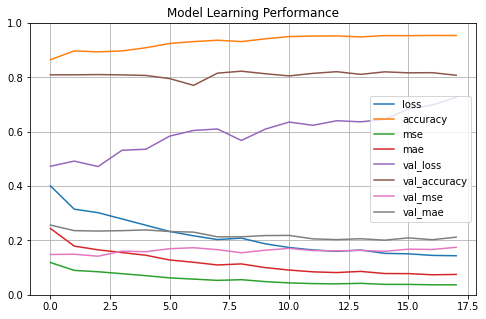

In [22]:
tuned_model_mf.fit()

In [23]:
# Form batches (does not shuffle, cuts off remainder)
batched_2015_mf_tuned = tuned_model_mf.batch_prefetch_data(data2015_mf,split_data=False)
# Cutoff matching remainder from labels
true_labels_mf_tuned = labels2015_mf[:-(labels2015_mf.shape[0]%tuned_model_mf.batch_size)]

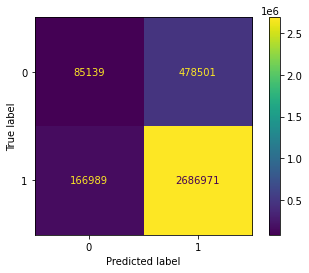

In [24]:
conf_matrix = tuned_model_mf.predict_conf_matrix(batched_2015_mf_tuned,true_labels_mf_tuned,make_plots=True)

In [50]:
tuned_model_mf.calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.941489,0.848837,0.662318,0.119899


In [25]:
tuned_model_mf.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 16)             2624      
                                                                 
 lstm_3 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 4,753
Trainable params: 4,753
Non-trainable params: 0
_________________________________________________________________


In [26]:
keras.backend.clear_session()

# Feature Selection Model

In [ ]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

In [27]:
DataSelection(data, 2014, "./", feature_selection=True, use_all=False)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0008475780487060547
Num GB used in data array: 0.001963376998901367
Num GB used in data array: 0.003701448440551758
Num GB used in data array: 0.004388093948364258
Num GB used in data array: 0.004903078079223633
Num GB used in data array: 0.005300045013427734
Num GB used in data array: 0.0072634220123291016
Num GB used in data array: 0.007381439208984375
Num GB used in data array: 0.008465051651000977
Num GB used in data array: 0.009065866470336914
Num GB used in data array: 0.012778043746948242
Num GB used in data array: 0.01337885856628418
Num GB used in data array: 0.015106201171875
Num GB used in data array: 0.017713308334350586
Num GB used in data array: 0.018045902252197266
Num GB used in data array: 0.03292679786682129
Num GB used in data array: 0.034461021423339844
Num GB used in data array: 0.03457903861999512
Num GB used in data array: 0.03464341163635254
Num GB used in data array: 0.035083293914794

In [28]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", feature_selection=True, use_all=False, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0009870529174804688
Num GB used in data array: 0.003465414047241211
Num GB used in data array: 0.005525350570678711
Num GB used in data array: 0.007628202438354492
Num GB used in data array: 0.009924173355102539
Num GB used in data array: 0.010524988174438477
Num GB used in data array: 0.011125802993774414
Num GB used in data array: 0.014623403549194336
Num GB used in data array: 0.01474142074584961
Num GB used in data array: 0.015031099319458008
Num GB used in data array: 0.01855015754699707
Num GB used in data array: 0.019150972366333008
Num GB used in data array: 0.019429922103881836
Num GB used in data array: 0.02233743667602539
Num GB used in data array: 0.02267003059387207
Num GB used in data array: 0.03632783889770508
Num GB used in data array: 0.03875255584716797
Num GB used in data array: 0.03983616828918457
Num GB used in data array: 0.03990054130554199
Num GB used in data array: 0.04019021987915039

In [29]:
data2014_sf = np.load("data_2014.npy")
labels2014_sf = np.load("labels_2014.npy")

In [30]:
data2014_sf.shape

(25649, 120, 12)

In [31]:
fs_model = SolarLSTM(data2014_sf, labels2014_sf, "./")

In [32]:
fs_model.build_model()

In [33]:
fs_model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (64, 120, 16)             1856      
                                                                 
 lstm_1 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout (Dropout)           (64, 120, 16)             0         
                                                                 
 dense (Dense)               (64, 120, 1)              17        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3736 - accuracy: 0.8770 - mse: 0.1100 - mae: 0.2293

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 34s 95ms/step - loss: 0.3736 - accuracy: 0.8770 - mse: 0.1100 - mae: 0.2293 - val_loss: 0.5809 - val_accuracy: 0.8104 - val_mse: 0.1662 - val_mae: 0.2143
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.2941 - accuracy: 0.9013 - mse: 0.0818 - mae: 0.1579

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 29s 92ms/step - loss: 0.2941 - accuracy: 0.9013 - mse: 0.0818 - mae: 0.1579 - val_loss: 0.5623 - val_accuracy: 0.8070 - val_mse: 0.1626 - val_mae: 0.2259
Epoch 3/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2721 - accuracy: 0.9132 - mse: 0.0744 - mae: 0.1485 - val_loss: 0.5852 - val_accuracy: 0.7802 - val_mse: 0.1710 - val_mae: 0.2375
Epoch 4/50
320/320 [==============================] - ETA: 0s - loss: 0.2621 - accuracy: 0.9172 - mse: 0.0701 - mae: 0.1422

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 29s 92ms/step - loss: 0.2621 - accuracy: 0.9172 - mse: 0.0701 - mae: 0.1422 - val_loss: 0.5544 - val_accuracy: 0.8134 - val_mse: 0.1575 - val_mae: 0.2159
Epoch 5/50
320/320 [==============================] - 20s 64ms/step - loss: 0.2430 - accuracy: 0.9249 - mse: 0.0646 - mae: 0.1332 - val_loss: 0.5753 - val_accuracy: 0.8138 - val_mse: 0.1599 - val_mae: 0.2115
Epoch 6/50
320/320 [==============================] - 21s 64ms/step - loss: 0.2334 - accuracy: 0.9260 - mse: 0.0626 - mae: 0.1277 - val_loss: 0.5896 - val_accuracy: 0.8110 - val_mse: 0.1619 - val_mae: 0.2138
Epoch 7/50
320/320 [==============================] - 21s 65ms/step - loss: 0.2265 - accuracy: 0.9267 - mse: 0.0609 - mae: 0.1245 - val_loss: 0.6121 - val_accuracy: 0.8090 - val_mse: 0.1651 - val_mae: 0.2133
Epoch 8/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2257 - accuracy: 0.9252 - mse: 0.0612 - mae: 0.1222 - val_loss: 0.5922 - val_accuracy: 0.8147 - val_m

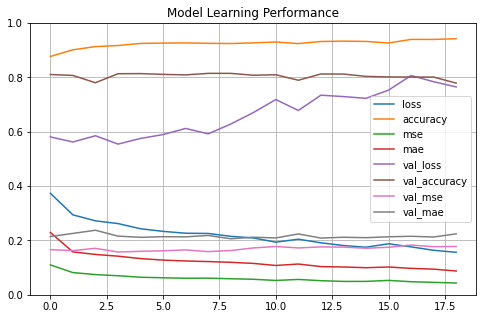

In [34]:
history=fs_model.fit()

In [35]:
data2015_sf = np.load("data_2015.npy")
labels2015_sf = np.load("labels_2015.npy")

In [36]:
data2015_sf.shape

(28486, 120, 12)

In [37]:
fs_new = fs_model.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
fs_model.evaluate(fs_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 9s 20ms/step - loss: 0.6663 - accuracy: 0.8022 - mse: 0.1634 - mae: 0.2083


[0.6663143634796143,
 0.802189826965332,
 0.16335035860538483,
 0.2082843780517578]

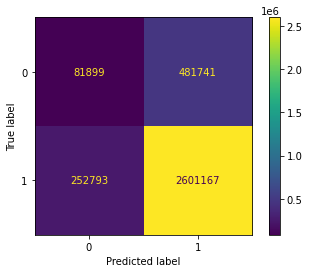

In [38]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_sf = fs_model.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_sf = labels2015_sf[:-(labels2015_sf.shape[0] % fs_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_sf = fs_model.predict_conf_matrix(batched_2015_sf,true_labels_sf,make_plots=True)

In [39]:
conf_matrix_sf

array([[  81899,  481741],
       [ 252793, 2601167]])

In [40]:
fs_model.calculate_statistics(conf_matrix_sf)

,precision,recall,far,hss
0,0.911424,0.843738,0.7553,0.069245


In [41]:
keras.backend.clear_session()

In [42]:
tuned_fs_model = SolarLSTM(data2014_sf, labels2014_sf, "./", tune=True)

In [43]:
tuned_fs_model.build_model()

Model not found
Building Model...
INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3591 - accuracy: 0.8776 - mse: 0.1079 - mae: 0.2208

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 34s 98ms/step - loss: 0.3591 - accuracy: 0.8776 - mse: 0.1079 - mae: 0.2208 - val_loss: 0.6025 - val_accuracy: 0.8094 - val_mse: 0.1681 - val_mae: 0.2287
Epoch 2/50
320/320 [==============================] - 21s 66ms/step - loss: 0.2907 - accuracy: 0.8922 - mse: 0.0816 - mae: 0.1587 - val_loss: 0.6469 - val_accuracy: 0.8033 - val_mse: 0.1757 - val_mae: 0.2263
Epoch 3/50
320/320 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.9002 - mse: 0.0721 - mae: 0.1436

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 29s 91ms/step - loss: 0.2619 - accuracy: 0.9002 - mse: 0.0721 - mae: 0.1436 - val_loss: 0.6021 - val_accuracy: 0.7865 - val_mse: 0.1652 - val_mae: 0.2220
Epoch 4/50
320/320 [==============================] - 20s 64ms/step - loss: 0.2471 - accuracy: 0.9164 - mse: 0.0669 - mae: 0.1342 - val_loss: 0.6083 - val_accuracy: 0.7839 - val_mse: 0.1661 - val_mae: 0.2213
Epoch 5/50
320/320 [==============================] - 21s 64ms/step - loss: 0.2485 - accuracy: 0.9197 - mse: 0.0670 - mae: 0.1336 - val_loss: 0.6310 - val_accuracy: 0.7849 - val_mse: 0.1740 - val_mae: 0.2333
Epoch 6/50
320/320 [==============================] - ETA: 0s - loss: 0.2286 - accuracy: 0.9313 - mse: 0.0600 - mae: 0.1243

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 29s 90ms/step - loss: 0.2286 - accuracy: 0.9313 - mse: 0.0600 - mae: 0.1243 - val_loss: 0.5958 - val_accuracy: 0.8197 - val_mse: 0.1607 - val_mae: 0.2039
Epoch 7/50
320/320 [==============================] - 20s 62ms/step - loss: 0.2272 - accuracy: 0.9232 - mse: 0.0613 - mae: 0.1212 - val_loss: 0.6504 - val_accuracy: 0.7533 - val_mse: 0.1856 - val_mae: 0.2463
Epoch 8/50
320/320 [==============================] - 20s 62ms/step - loss: 0.2173 - accuracy: 0.9298 - mse: 0.0574 - mae: 0.1168 - val_loss: 0.6057 - val_accuracy: 0.7879 - val_mse: 0.1664 - val_mae: 0.2166
Epoch 9/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2064 - accuracy: 0.9355 - mse: 0.0539 - mae: 0.1100 - val_loss: 0.6320 - val_accuracy: 0.7790 - val_mse: 0.1745 - val_mae: 0.2243
Epoch 10/50
320/320 [==============================] - 20s 63ms/step - loss: 0.2126 - accuracy: 0.9309 - mse: 0.0566 - mae: 0.1127 - val_loss: 0.6359 - val_accuracy: 0.7626 - val_

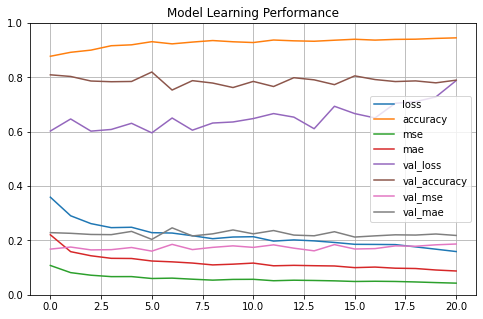

In [44]:
history=tuned_fs_model.fit()

In [45]:
tuned_fs_new = tuned_fs_model.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
tuned_fs_model.evaluate(tuned_fs_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 9s 20ms/step - loss: 0.6283 - accuracy: 0.8239 - mse: 0.1534 - mae: 0.1890


[0.6282752156257629,
 0.8239012956619263,
 0.1533949226140976,
 0.1889794021844864]

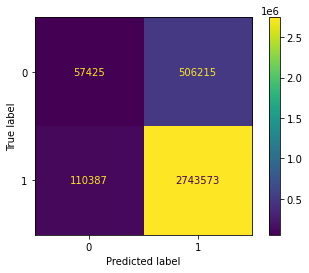

In [46]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_tuned_sf = tuned_fs_model.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_tuned_sf = labels2015_sf[:-(labels2015_sf.shape[0] % tuned_fs_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_tuned_sf = tuned_fs_model.predict_conf_matrix(batched_2015_tuned_sf,true_labels_tuned_sf,make_plots=True)

In [47]:
conf_matrix_tuned_sf

array([[  57425,  506215],
       [ 110387, 2743573]])

In [48]:
tuned_fs_model.calculate_statistics(conf_matrix_tuned_sf)

,precision,recall,far,hss
0,0.961321,0.844231,0.657802,0.088342


In [49]:
tuned_fs_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 16)             1856      
                                                                 
 lstm_3 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


# Model with Recurrent Dropout and Lower Units Tuning

* Using feature selection
* Tuning with units from 10 to 16 with step size 1
* Removed the Dropout layer and instead used the recurrent_dropout = .2 in the keras.layers.LSTM function call

In [ ]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

In [ ]:
DataSelection(data, 2014, "./", feature_selection=True, use_all=False)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0008475780487060547
Num GB used in data array: 0.001963376998901367
Num GB used in data array: 0.003701448440551758
Num GB used in data array: 0.004388093948364258
Num GB used in data array: 0.004903078079223633
Num GB used in data array: 0.005300045013427734
Num GB used in data array: 0.0072634220123291016
Num GB used in data array: 0.007381439208984375
Num GB used in data array: 0.008465051651000977
Num GB used in data array: 0.009065866470336914
Num GB used in data array: 0.012778043746948242
Num GB used in data array: 0.01337885856628418
Num GB used in data array: 0.015106201171875
Num GB used in data array: 0.017713308334350586
Num GB used in data array: 0.018045902252197266
Num GB used in data array: 0.03292679786682129
Num GB used in data array: 0.034461021423339844
Num GB used in data array: 0.03457903861999512
Num GB used in data array: 0.03464341163635254
Num GB used in data array: 0.035083293914794

In [ ]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", feature_selection=True, use_all=False, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0009870529174804688
Num GB used in data array: 0.003465414047241211
Num GB used in data array: 0.005525350570678711
Num GB used in data array: 0.007628202438354492
Num GB used in data array: 0.009924173355102539
Num GB used in data array: 0.010524988174438477
Num GB used in data array: 0.011125802993774414
Num GB used in data array: 0.014623403549194336
Num GB used in data array: 0.01474142074584961
Num GB used in data array: 0.015031099319458008
Num GB used in data array: 0.01855015754699707
Num GB used in data array: 0.019150972366333008
Num GB used in data array: 0.019429922103881836
Num GB used in data array: 0.02233743667602539
Num GB used in data array: 0.02267003059387207
Num GB used in data array: 0.03632783889770508
Num GB used in data array: 0.03875255584716797
Num GB used in data array: 0.03983616828918457
Num GB used in data array: 0.03990054130554199
Num GB used in data array: 0.04019021987915039

In [ ]:
data2014_sf = np.load("data_2014.npy")
labels2014_sf = np.load("labels_2014.npy")

In [ ]:
data2014_sf.shape

(25649, 120, 12)

In [ ]:
model3 = SolarLSTM(data2014_sf, labels2014_sf, "./", tune=True,
                   units=(10, 16, 1), regularization=("early stopping"))

In [ ]:
model3.build_model()

In [ ]:
model3.model

Trial 10 Complete [00h 10m 22s]
val_accuracy: 0.8107714653015137

Best val_accuracy So Far: 0.8234326243400574
Total elapsed time: 01h 46m 08s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.8748 - mse: 0.1108 - mae: 0.2415INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 42s 122ms/step - loss: 0.3670 - accuracy: 0.8748 - mse: 0.1108 - mae: 0.2415 - val_loss: 0.6097 - val_accuracy: 0.7730 - val_mse: 0.1791 - val_mae: 0.2626
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.9151 - mse: 0.0729 - mae: 0.1464INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 39s 123ms/step - loss: 0.2665 - accuracy: 0.9151 - mse: 0.0729 - mae: 0.1464 - val_loss: 0.6022 - val_accuracy: 0.7784 - val_mse: 0.1739 - val_mae: 0.2499
Epoch 3/50
320/320 [==============================] - 32s 100ms/step - loss: 0.2606 - accuracy: 0.9103 - mse: 0.0719 - mae: 0.1425 - val_loss: 0.6618 - val_accuracy: 0.7271 - val_mse: 0.1944 - val_mae: 0.2767
Epoch 4/50
320/320 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9094 - mse: 0.0713 - mae: 0.1428INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 38s 119ms/step - loss: 0.2572 - accuracy: 0.9094 - mse: 0.0713 - mae: 0.1428 - val_loss: 0.5946 - val_accuracy: 0.7873 - val_mse: 0.1675 - val_mae: 0.2334
Epoch 5/50
320/320 [==============================] - 32s 100ms/step - loss: 0.2394 - accuracy: 0.9249 - mse: 0.0649 - mae: 0.1310 - val_loss: 0.6305 - val_accuracy: 0.7758 - val_mse: 0.1752 - val_mae: 0.2348
Epoch 6/50
320/320 [==============================] - 32s 101ms/step - loss: 0.2322 - accuracy: 0.9255 - mse: 0.0633 - mae: 0.1265 - val_loss: 0.6533 - val_accuracy: 0.7732 - val_mse: 0.1797 - val_mae: 0.2367
Epoch 7/50
320/320 [==============================] - 32s 99ms/step - loss: 0.2261 - accuracy: 0.9280 - mse: 0.0615 - mae: 0.1253 - val_loss: 0.6459 - val_accuracy: 0.8078 - val_mse: 0.1702 - val_mae: 0.2256
Epoch 8/50
320/320 [==============================] - 32s 99ms/step - loss: 0.2196 - accuracy: 0.9241 - mse: 0.0611 - mae: 0.1228 - val_loss: 0.6933 - val_accuracy: 0.7763 - va

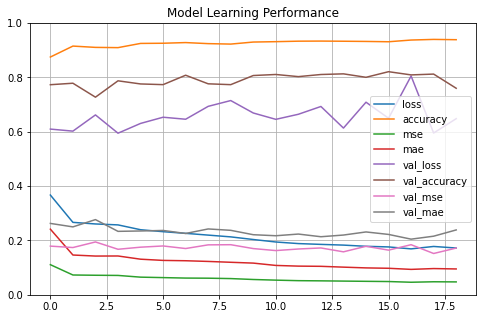

In [ ]:
history=model3.fit()

In [ ]:
data2015_sf = np.load("data_2015.npy")
labels2015_sf = np.load("labels_2015.npy")

In [ ]:
data2015_sf.shape

(28486, 120, 12)

In [ ]:
new3 = model3.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
model3.evaluate(new3)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 11s 25ms/step - loss: 0.6049 - accuracy: 0.7821 - mse: 0.1647 - mae: 0.2305


[0.6049373745918274,
 0.7820546627044678,
 0.1646636724472046,
 0.23050378262996674]

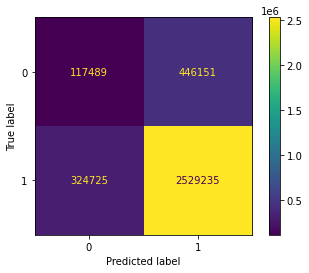

In [ ]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_3 = model3.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_3 = labels2015_sf[:-(labels2015_sf.shape[0] % model3.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_3 = model3.predict_conf_matrix(batched_2015_3,true_labels_3,make_plots=True)

In [ ]:
conf_matrix_3

array([[ 117489,  446151],
       [ 324725, 2529235]])

In [ ]:
model3.calculate_statistics(conf_matrix_3)

,precision,recall,far,hss
0,0.886219,0.850053,0.734316,0.106959


In [ ]:
true_labels_3.shape

(28480, 120, 1)